# 2D Gaussian Fit to Laser Beam Profile

Step 1: Select image for analysis
* Make sure spot fills most of the image for speed of analysis - crop if necessary
* Ensure image is not saturating anywhere (white pixels) - use ND filters to reduce laser intensity if necessary
* If difficult to see the laser spot clearly, use a white plastic card

Example image "Spot cropped.jpg":
<img src="Spot cropped.jpg" width="200"/>

Step 2: Run code in cell below to fit a 2D gaussian
* Enter the calibration px_per_um value - see end of notebook for procedure with USB microscope
* Output image is a contour plot of the fit over the grayscale image
* Output text are the 2 fitted Gaussian waists

<IPython.core.display.Javascript object>


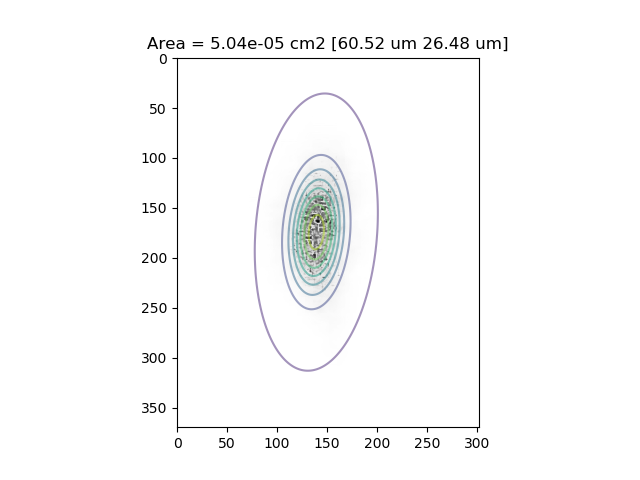

Gaussian radius: x = 60.52 um and y = 26.48 um
Area = 5.04e-05 cm^2


In [4]:
from PIL import Image
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib notebook
# Import Gaussian fitting function 'FitGauss2D'
%run GaussianFit.py

# USER INPUT
fn = '181015105943498'
ext = '.jpg'
px_per_um = 633.718/2000
um_per_px = 1/px_per_um

# Begin analysis
im = Image.open('Images/' + fn + ext).convert('L')
fig, ax = plt.subplots()
data = np.array(im)
ax.imshow(data, cmap='Greys')
p,success = FitGauss2D(data,ip=None)
amplitude, xcenter, ycenter, xsigma, ysigma, rot,bkg = p
func = Gaussian2D(amplitude, xcenter, ycenter, xsigma, ysigma, rot, bkg)
x, y = np.indices(np.shape(data),dtype=np.float)
ax.contour(func(x, y), alpha=0.5)

w1 = xsigma * um_per_px / 2  # first beam waist [um]
w2 = ysigma * um_per_px / 2  # second beam waist [um]
print('Gaussian radius: x = {:.2f} um and y = {:.2f} um'.format(w1, w2))
area = w1 * w2 * np.pi * 1E-8 # Beam area - assuming ellipse [cm2]
print('Area = {:.3g} cm^2'.format(area))

plt.title('Area = {:.3g} cm2 [{:.2f} um {:.2f} um]'.format(area, w1, w2))
plt.savefig('Images/' + fn + '_processed' + ext)

# Extra
## To calibrate with USB microscope
* Position USB microscope so that the laser spot is in the frame
* Turn off the laser and place a graticule with a reference line width on the sample surface where the spot was
* Focus the USB microscope onto the graticule by either adjusting the height or the focal length dial
* Capture an image of the graticule reference line
* Remove graticule, turn on laser and take an image of the spot
* In ImageJ/Fiji open the graticule image. Using the line tool measure the width of the reference line in px. This gives the px_per_um value (pixel_length / graticule_line_width_um)

## Laser fluence evaluation
The average laser fluence, $ F_{avg} [J/cm^2]$ is related to the pulse energy, $E_{pulse}$, and beam area, $A$ via


$$ F_{avg} = \frac{E_{pulse}}{A}. $$

The area of an ellipse, i.e. a 2D Gaussian profile, is $ A = \pi w_1 w_2$ where $w_1$ and $w_2$ are the radiuses/beam waist's in each axis.

In [11]:
def calc_F(E, area):
    """Convert pulse energy [J] and beam area [cm^2] to average fluence [J/cm2]"""
    return E / area

E_pulse = 215E-6  # Pulse energy [J]
print('Fluence = {:.2f} J/cm2 at a pulse energy of {:.3g} uJ'.format(calc_F(E_pulse, area), E_pulse*1E6))

Fluence = 4.27 J/cm2 at a pulse energy of 215 uJ


In [46]:
calc_F(44E-6, 5.05E-5)

0.8712871287128713

In [30]:
# Film thickness per 180k pulses
0.131*np.exp(.7/1.015) * 8

2.0886935155020363

In [45]:
(440/215) * 44

90.04651162790698